# Part 2

In [3]:
import numpy as np
A = np.array([[0 for i in range(6)] for j in range(9)])
A[:,2:4] = 1
A[0:2,1:5] = 1
A[7:9,1:5] = 1
tmp = np.array([0 for i in range(6)])
B = np.row_stack([tmp,A,tmp])
C = np.array([[i+j*6+1 for i in range(6)] for j in range(11)])
D = np.multiply(B,C)
E = np.array([i for row in D for i in row if i])
max, min = E.max(), E.min()
F = np.array([(E[i] - min) / (max - min) for i in range(len(E))])
idx = np.abs(F-0.25).argmin()
print(F[idx])
print(A)
print(B)
print(C)
print(D)
print(E)
print(F)


[[0 1 1 1 1 0]
 [0 1 1 1 1 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]
 [0 1 1 1 1 0]
 [0 1 1 1 1 0]]
[[0 0 0 0 0 0]
 [0 1 1 1 1 0]
 [0 1 1 1 1 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]
 [0 1 1 1 1 0]
 [0 1 1 1 1 0]
 [0 0 0 0 0 0]]
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]
 [31 32 33 34 35 36]
 [37 38 39 40 41 42]
 [43 44 45 46 47 48]
 [49 50 51 52 53 54]
 [55 56 57 58 59 60]
 [61 62 63 64 65 66]]
[[ 0  0  0  0  0  0]
 [ 0  8  9 10 11  0]
 [ 0 14 15 16 17  0]
 [ 0  0 21 22  0  0]
 [ 0  0 27 28  0  0]
 [ 0  0 33 34  0  0]
 [ 0  0 39 40  0  0]
 [ 0  0 45 46  0  0]
 [ 0 50 51 52 53  0]
 [ 0 56 57 58 59  0]
 [ 0  0  0  0  0  0]]
[ 8  9 10 11 14 15 16 17 21 22 27 28 33 34 39 40 45 46 50 51 52 53 56 57
 58 59]
[0.         0.01960784 0.03921569 0.05882353 0.11764706 0.1372549
 0.15686275 0.17647059 0.25490196 0.2745098  0.37254902 0.39215686
 0.49019608 0.509803

# Part 3

In [13]:
from __future__ import print_function
import numpy as np
import random
import sys
from functools import reduce
import tensorflow as tf
import initializeX
import lossFunction
import optimizerFunction
import computeLoss
import trainStep
#import plotFunction

# # Preliminary setup, do not modify
# if len(sys.argv) > 1:
#     random.seed(int(sys.argv[1]))
#     np.random.seed(int(sys.argv[1]))
# else:
#     random.seed(int(1))
#     np.random.seed(int(1))

def shape(V):
    return list(map(int, list(V.shape)))

total = lambda shape : reduce(lambda x, y : x * y, shape, 1)
assert(total([3,4,1]) == 12)
# Preliminary setup over

#1. Create the constant a
a = tf.constant(10, dtype=tf.float32)

#2. Create the variable X. Here, recommended that you initialize X 
# from a numpy array with random numbers selected from between 0 and 1.
X = initializeX.function(shape=(4,1))
shapeOfX = shape(X)
if not ((len(shapeOfX) == 2) and (shapeOfX[0] == 4) and (shapeOfX[1] == 1)):
    raise ValueError("Variable X doesn't have the correct shape")
else:
    print("X of correct shape has been returned")

#3. Create the constant b
b = tf.constant(np.arange(4).reshape((4,1)), dtype=tf.float32)

#3. Create the constant y
y = tf.constant(15, dtype=tf.float32)

#4. Create the tensorflow computation graph. The graph outputs 
# the loss function that was described above. The function you
# write must evaluate (a(X^t*X) + b^t*X - y) ** 2
loss = lossFunction.function(a, X, b, y)

shapeOfLoss = shape(loss)
print("Loss has shape", shapeOfLoss)
assert(total(shapeOfLoss) == 1), "Loss is not a scalar!"


optimizer = optimizerFunction.function(loss, lr=1e-3)

#6. Launch the training loop. We want to track the loss function over the training iterations
# We will launch 250 training iterations
session = tf.Session()
session.run(tf.global_variables_initializer())

lossValues = []

for i in range(250):
    # 7. Implement a function that provides the printable value of loss
    lossValue = computeLoss.function(session, loss)

    # 8. Implement a function that performs loss minimization
    trainStep.function(session, optimizer)

    # 9. Print out loss
    print("Iteration %d, loss = %f"%(i, lossValue))

    lossValues.append(lossValue)

X of correct shape has been returned
Loss has shape [1, 1]
Iteration 0, loss = 4.194384
Iteration 1, loss = 3.983804
Iteration 2, loss = 3.779122
Iteration 3, loss = 3.580415
Iteration 4, loss = 3.387735
Iteration 5, loss = 3.201127
Iteration 6, loss = 3.020660
Iteration 7, loss = 2.846343
Iteration 8, loss = 2.678199
Iteration 9, loss = 2.516238
Iteration 10, loss = 2.360466
Iteration 11, loss = 2.210861
Iteration 12, loss = 2.067405
Iteration 13, loss = 1.930057
Iteration 14, loss = 1.798761
Iteration 15, loss = 1.673475
Iteration 16, loss = 1.554100
Iteration 17, loss = 1.440579
Iteration 18, loss = 1.332798
Iteration 19, loss = 1.230666
Iteration 20, loss = 1.134064
Iteration 21, loss = 1.042861
Iteration 22, loss = 0.956939
Iteration 23, loss = 0.876148
Iteration 24, loss = 0.800341
Iteration 25, loss = 0.729360
Iteration 26, loss = 0.663048
Iteration 27, loss = 0.601234
Iteration 28, loss = 0.543752
Iteration 29, loss = 0.490423
Iteration 30, loss = 0.441069
Iteration 31, loss = 

In [14]:
loss = []
for i in lossValues:
    for j in i:
        loss.append(j)

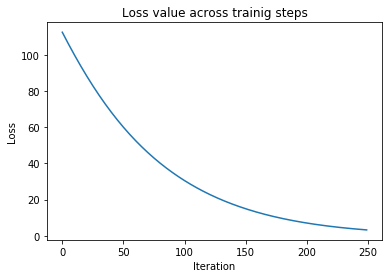

In [9]:
loss
import matplotlib.pyplot as plt
plt.plot(loss)
plt.title('Loss value across trainig steps')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

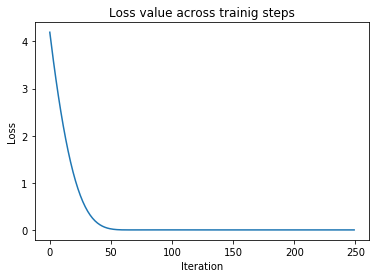

In [15]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.title('Loss value across trainig steps')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()